In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns

In [212]:
df = pd.read_csv("../data/vehicle loand dataset.csv", header=0)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [213]:
df.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [214]:
df.shape

(121856, 40)

In [215]:
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [216]:
df1 = df.drop("ID", axis = 1)
df1 = df1.drop("Social_Circle_Default", axis = 1)
df1 = df1.drop("Own_House_Age", axis = 1)
df1 = df1.drop("Client_Occupation", axis = 1)
df1 = df1.drop("Mobile_Tag", axis = 1)
df1 = df1.drop("Score_Source_3", axis = 1)
df1 = df1.drop("Credit_Bureau", axis = 1)
df1 = df1.drop("Score_Source_1", axis = 1)

In [217]:
print(df1.isnull().sum())

Client_Income                 3607
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Credit_Amount                 3632
Loan_Annuity                  4812
Accompany_Client              1746
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2413
Loan_Contract_Type            3651
Client_Housing_Type           3687
Population_Region_Relative    4857
Age_Days                      3600
Employed_Days                 3649
Registration_Days             3614
ID_Days                       5968
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization   

In [219]:
df1 = df1.dropna()

In [220]:
df1.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Phone_Change                  0
Default 

In [221]:
df1.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Default
count,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000
mean,0.342957,0.332986,0.498196,0.693541,0.413107,0.201373,0.280843,2.149230,2.029913,3.154457,12.068774,0.516352,969.016575,0.080903
std,0.474702,0.471286,0.500001,0.461027,0.724951,0.401030,0.449415,0.913309,0.502804,1.758049,3.274093,0.636380,829.101278,0.272688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.387957,278.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.563454,765.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.662939,1577.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,100.000000,4121.000000,1.000000


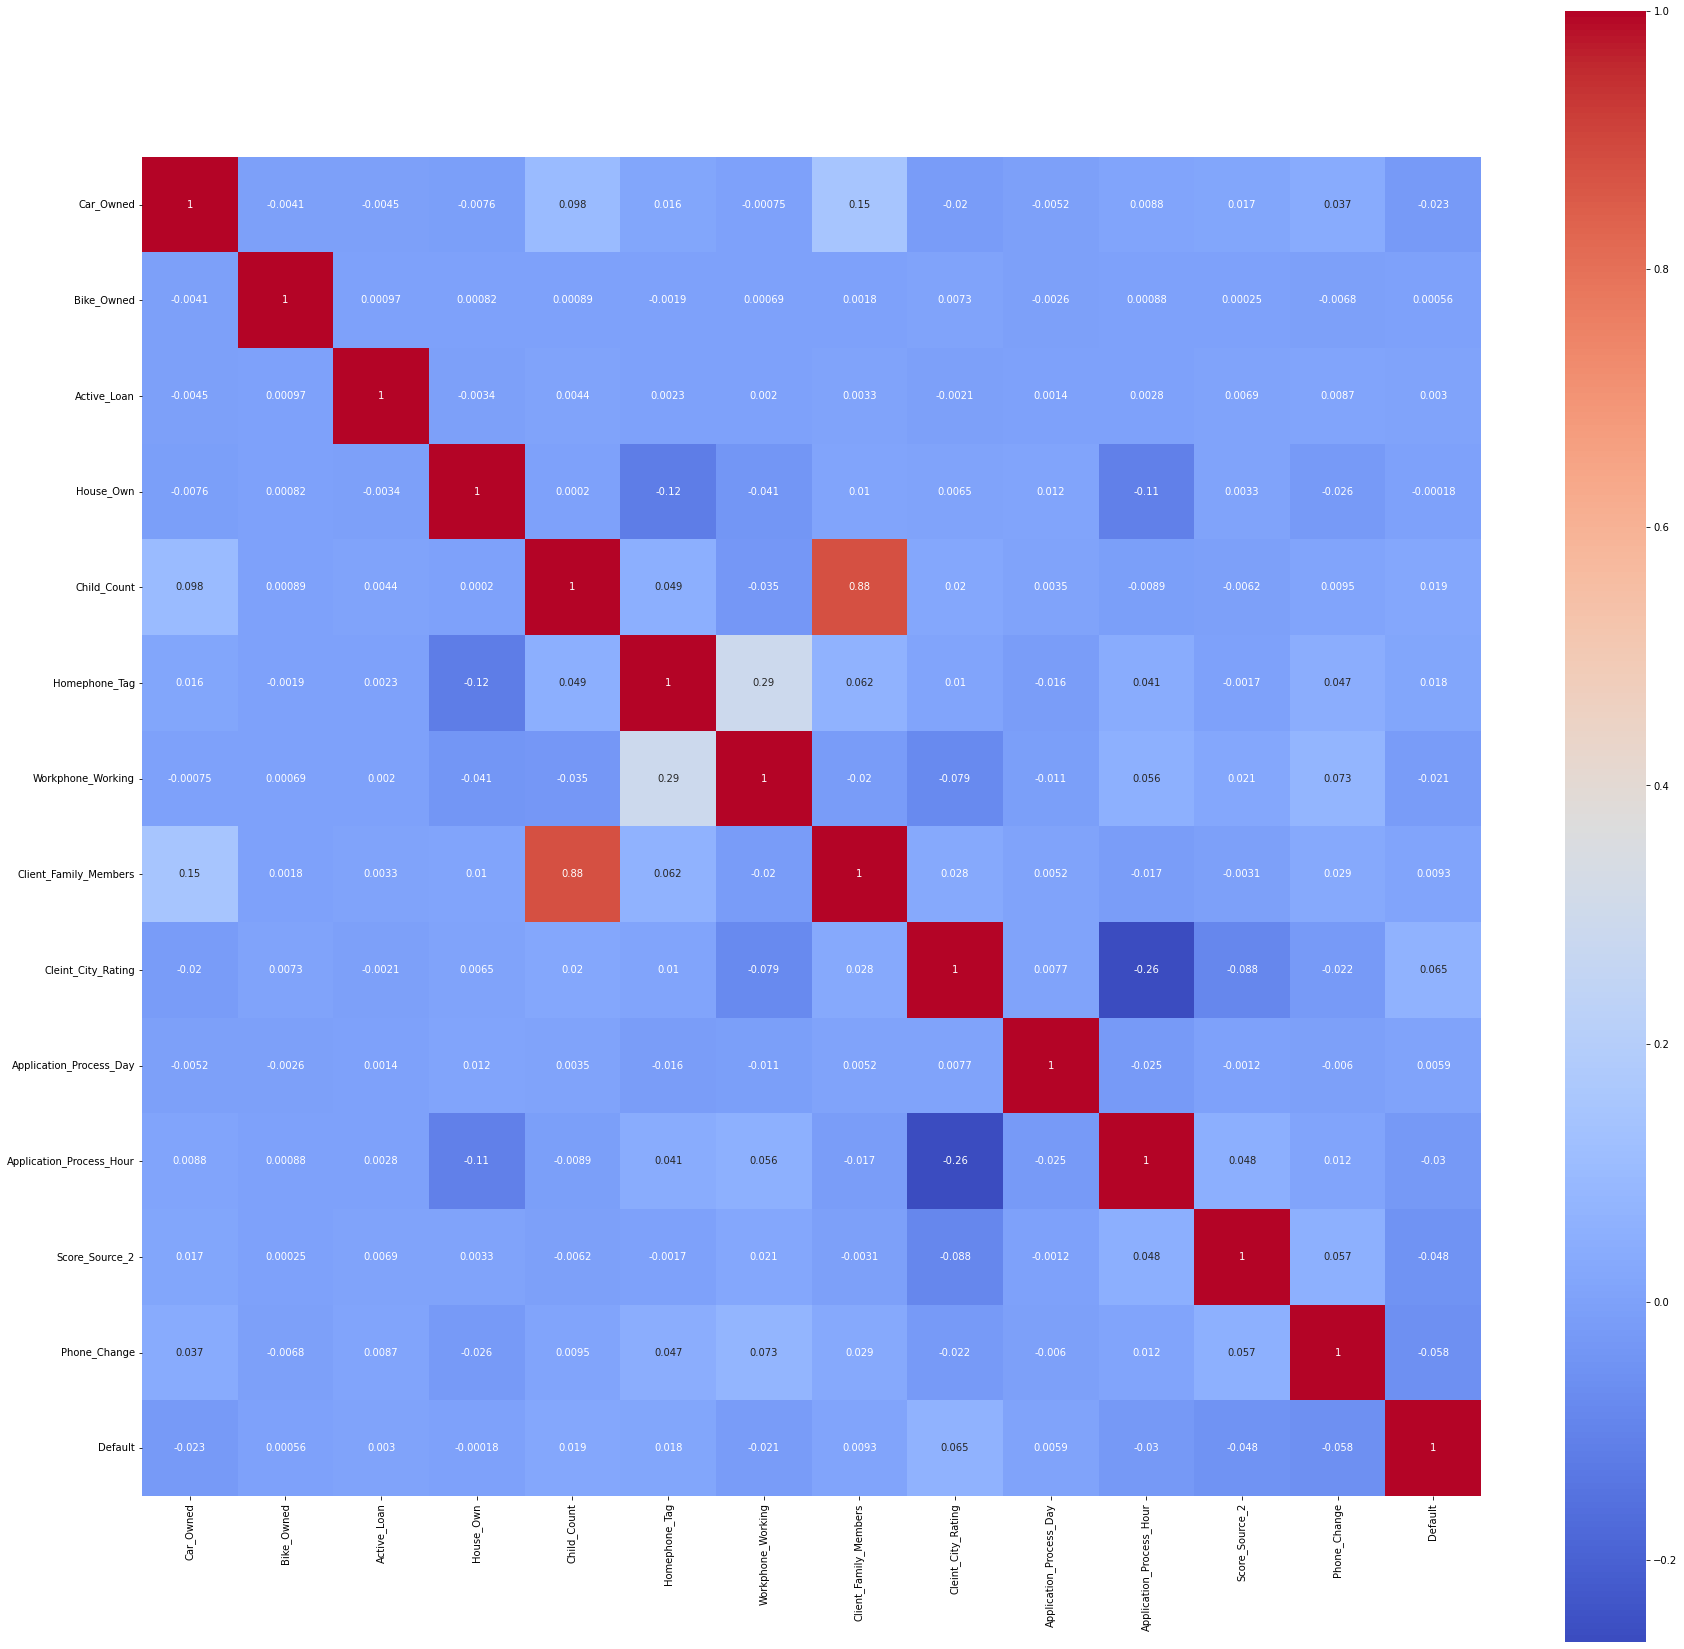

In [222]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [223]:
def correlation_fix(data, treshold):

    corr_cols_set = set()

    corr_matrix = df1.corr()

    m = corr_matrix.shape[0]

    n = corr_matrix.shape[1]

    for i in range(m):

        for j in range(n):

            if (abs(corr_matrix.iloc[i, j]) >= treshold):

                col = corr_matrix.columns[i]

                corr_cols_set.add(col)

    return corr_cols_set


In [224]:
corr_cols_set = correlation_fix(df1, 0.5)
corr_cols_set

{'Active_Loan',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Bike_Owned',
 'Car_Owned',
 'Child_Count',
 'Cleint_City_Rating',
 'Client_Family_Members',
 'Default',
 'Homephone_Tag',
 'House_Own',
 'Phone_Change',
 'Score_Source_2',
 'Workphone_Working'}

## correlated column dataframe

In [231]:

df_ = pd.DataFrame()
for i in range(len(corr_cols_set)):
    df_[f"X{i}"] = df1.iloc[:,i]

df_["Default"] = df1.iloc[:,-1]
df_.head(8)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,0
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,Service,Secondary,W,Female,CL,0
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,Secondary,S,Male,CL,0
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,Secondary,M,Male,CL,0
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,Graduation,S,Male,RL,0
11,15750,0.0,0.0,0.0,0.0,1.0,149963.85,4397.85,Alone,Service,Graduation,M,Male,CL,0
13,8100,0.0,1.0,0.0,0.0,0.0,90000,3826.35,Relative,Retired,Secondary,M,Male,CL,0
15,45000,1.0,0.0,0.0,1.0,1.0,105493.5,4482.45,Alone,Commercial,Secondary,M,Female,CL,0


In [227]:
df_.dtypes

X0      object
X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6      object
X7      object
X8      object
X9      object
X10     object
X11     object
X12     object
X13     object
dtype: object

In [233]:
df_.describe(include='all')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Default
count,53756,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.0,53756,53756,53756,53756,53756,53756,53756,53756.000000
unique,982,NaN,NaN,NaN,NaN,NaN,5283.0,12444,7,8,5,4,3,2,NaN
top,13500,NaN,NaN,NaN,NaN,NaN,45000.0,900,Alone,Service,Secondary,M,Male,CL,NaN
freq,5468,NaN,NaN,NaN,NaN,NaN,1139.0,878,43673,27719,38193,39571,35384,48711,NaN
mean,NaN,0.342957,0.332986,0.498196,0.693541,0.413107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080903
std,NaN,0.474702,0.471286,0.500001,0.461027,0.724951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272688
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [234]:
cols = df_.columns
num_cols = df_._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['X12', 'X0', 'X11', 'X8', 'X6', 'X9', 'X10', 'X13', 'X7']

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


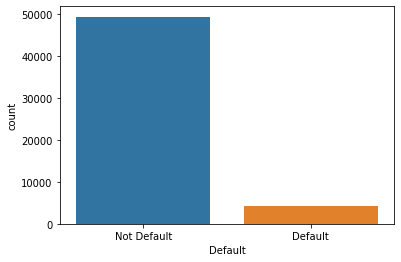

In [236]:
pred_var = sns.countplot(df_['Default'])
pred_var.set_xticklabels(['Not Default','Default'])
plt.show()

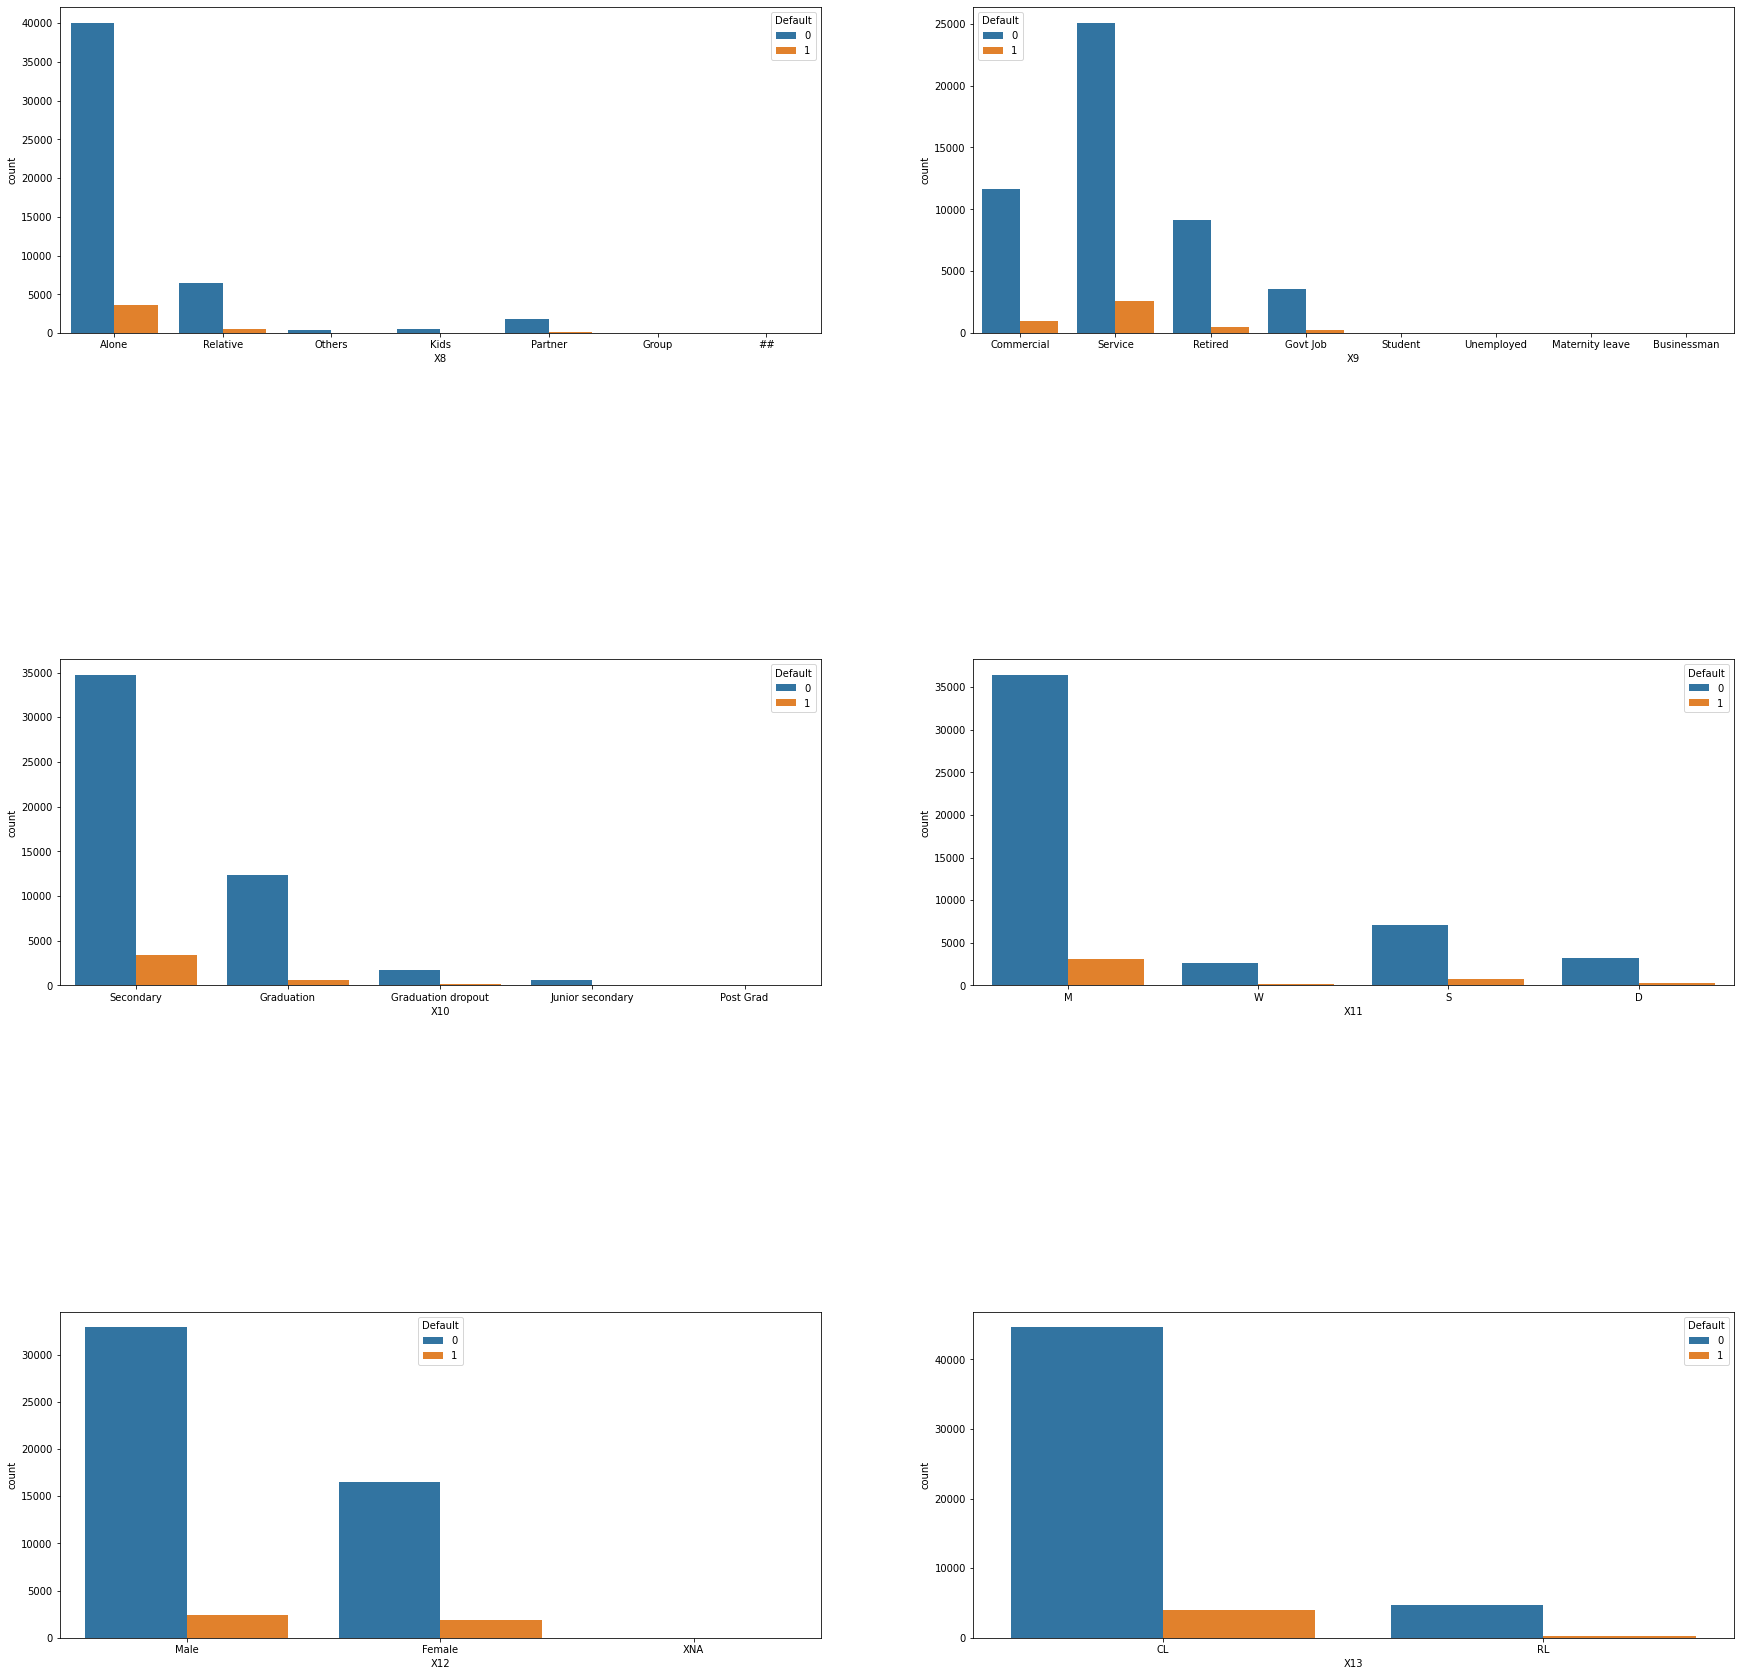

In [238]:
catg_cols = ['X8','X9','X10','X11','X12','X13']

figure, axes = plt.subplots(3, 2, figsize = (30, 30))

for index, catg_col in enumerate(catg_cols):

    row, col = index // 2, index % 2

    sns.countplot( x = catg_col, data = df_, hue = 'Default', ax=axes[row, col] ) 


plt.subplots_adjust(hspace = 1 )

In [265]:
X = df_.drop("Default",axis=1)  # independent columns
Y = df_.iloc[:,-1]   # target column 

In [266]:
X

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,Service,Secondary,W,Female,CL
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,Secondary,S,Male,CL
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,Secondary,M,Male,CL
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,Graduation,S,Male,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121850,12150,0.0,0.0,1.0,0.0,0.0,78192,2383.65,Alone,Retired,Secondary,S,Male,CL
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,Graduation,M,Female,CL
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,Secondary,M,Male,CL
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,Graduation,M,Female,CL


In [250]:
df_.X10.unique()

array(['Secondary', 'Graduation', 'Graduation dropout',
       'Junior secondary', 'Post Grad'], dtype=object)

In [241]:
Y

0         0
5         0
6         0
7         0
10        0
         ..
121850    0
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 53756, dtype: int64

In [268]:
X.head(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL
5,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,Service,Secondary,W,Female,CL
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,Secondary,S,Male,CL
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,Secondary,M,Male,CL
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,Graduation,S,Male,RL


In [296]:
X.X8.unique()

array(['Alone', 'Relative', 'Others', 'Kids', 'Partner', 'Group', '##'],
      dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


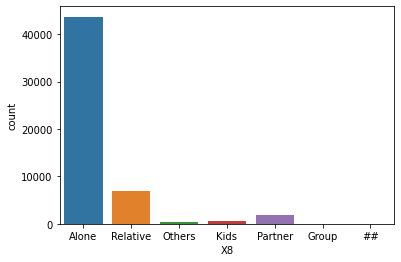

In [297]:
pred_var = sns.countplot(X['X8'])
pred_var.set_xticklabels(['Alone', 'Relative', 'Others', 'Kids', 'Partner', 'Group', '##'])
plt.show()

In [299]:
X['X8'] = [x if x in ('Alone','Relative') else 'Other' for x in X['X8']]

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


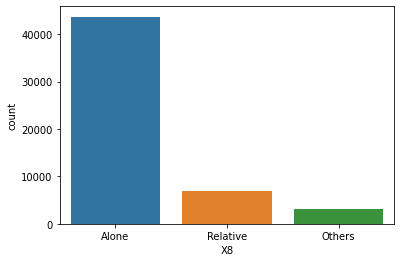

In [300]:
pred_var = sns.countplot(X['X8'])
pred_var.set_xticklabels(['Alone', 'Relative', 'Others'])
plt.show()

In [301]:
X.X9.unique()

array(['Commercial', 'Service', 'Retired', 'Govt Job', 'Student',
       'Unemployed', 'Maternity leave', 'Businessman'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


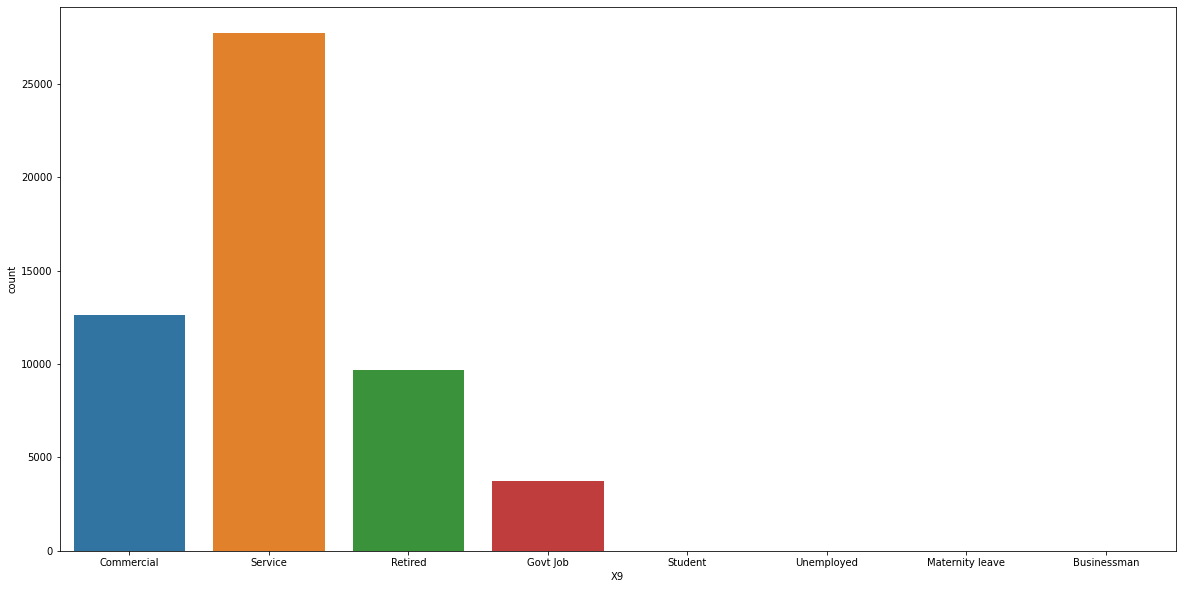

In [305]:
fig = plt.figure() 
fig.set_size_inches(20, 10)
pred_var = sns.countplot(X['X9'])
pred_var.set_xticklabels(['Commercial', 'Service', 'Retired', 'Govt Job', 'Student','Unemployed', 'Maternity leave', 'Businessman'])
plt.show()

In [328]:
X['X9'] = [x if x in ('Commercial', 'Service', 'Govt Job') else 'Other' for x in X['X9']]

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


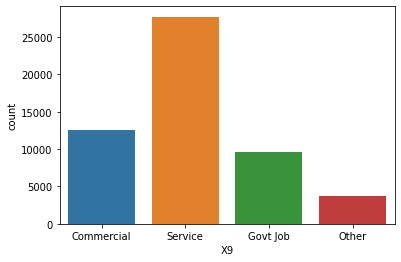

In [330]:
pred_var = sns.countplot(X['X9'])
pred_var.set_xticklabels(['Commercial', 'Service', 'Govt Job', 'Other'])
plt.show()

In [309]:
X.X10.unique()

array(['Secondary', 'Graduation', 'Graduation dropout',
       'Junior secondary', 'Post Grad'], dtype=object)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


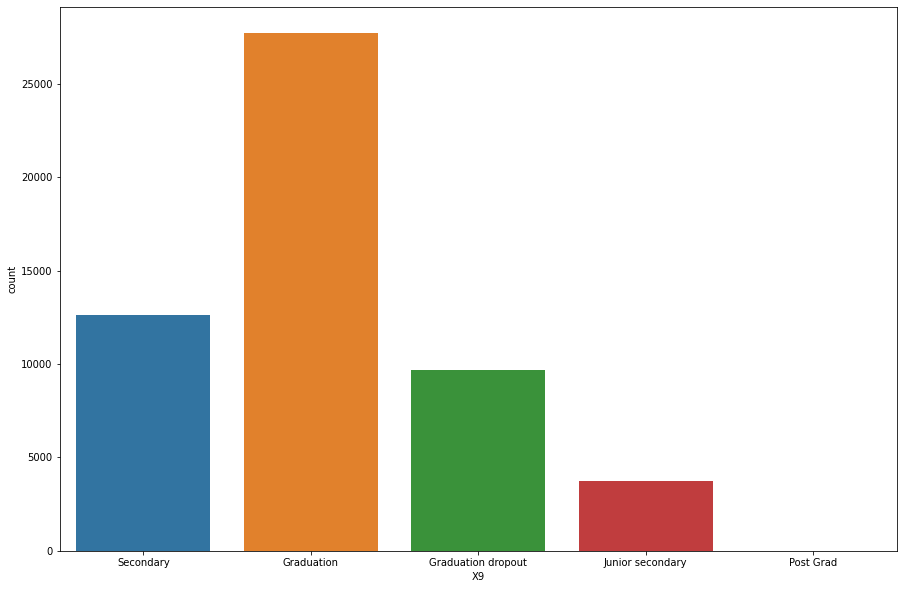

In [316]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X9'])
pred_var.set_xticklabels(['Secondary', 'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad'])
plt.show()

In [326]:
X['X10'] = [x if x in ('Secondary', 'Graduation') else 'Other' for x in X['X10']]

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


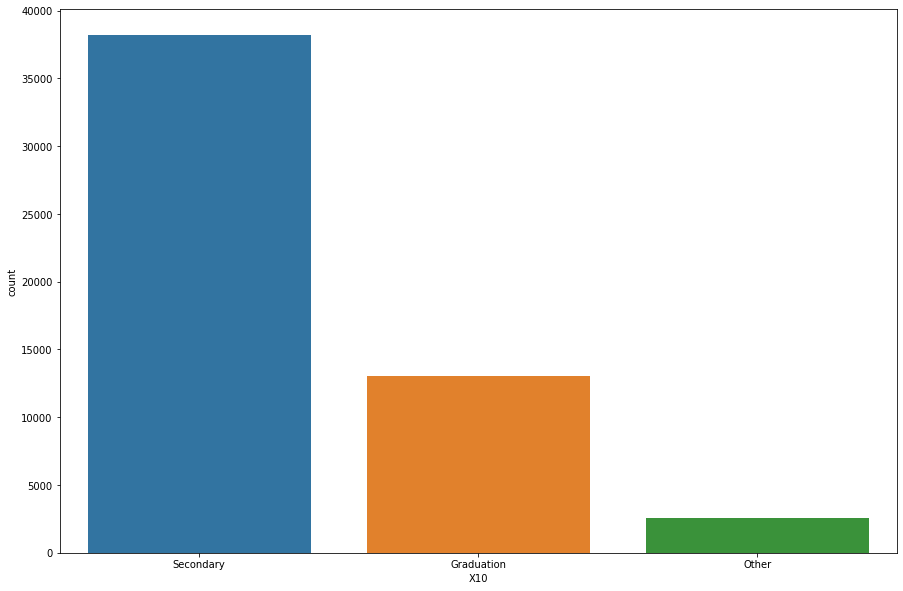

In [327]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['X10'])
pred_var.set_xticklabels(['Secondary', 'Graduation', 'Other'])
plt.show()

In [ ]:
['X8', 'X9', 'X10', 'X11', 'X12', 'X13']

In [ ]:
count = 0
for x in X:
    if x in categ_dummy_list:
        count =len(Fulldf[x].value_counts())
    count = 0

In [319]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8, 9, 10, 11, 12, 13])], remainder='passthrough')
X_new = np.array(transform.fit_transform(X))

In [320]:
X_new

array([[1.0, 0.0, 0.0, ..., 0.0, '61190.55', '3416.85'],
       [1.0, 0.0, 0.0, ..., 1.0, '13752', '653.85'],
       [1.0, 0.0, 0.0, ..., 0.0, '128835', '3779.55'],
       ...,
       [1.0, 0.0, 0.0, ..., 1.0, '55107.9', 2989.35],
       [1.0, 0.0, 0.0, ..., 0.0, '45000', 2719.35],
       [1.0, 0.0, 0.0, ..., 1.0, '62428.95', 4201.65]], dtype=object)

In [321]:
X_new.dtype 

dtype('O')

In [322]:
m = X_new.shape[0]
n = X_new.shape[1]
for i in range(m):
   for j in range(n):
    if(X_new[i,j]=='$'):
        X_new.dump


In [323]:

m = X_new.shape[0]
n = X_new.shape[1]
for i in range(m):
   for j in range(n):
    if(X_new[i,j]=='#VALUE!'):
        X_new[i,j] = 0.0

In [324]:
m = X_new.shape[0]
n = X_new.shape[1]
for i in range(m):
   for j in range(n):
    if(X_new[i,j]=='null'):
        X_new[i,j] = 0.0

In [325]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_new,Y)

ValueError: could not convert string to float: '$'

In [ ]:
print("Accuracy on training set:", linear_model.score(X_new,Y))

Accuracy on training set: 0.014896851996382021
